## Plotnine-prism Stacked Bar Chart

Stacked Bar Chart with Prism Theme Syling.

Plotnine Stacked Bar Chart from [here](https://plotnine.org/gallery/stage.html).

Then converted to Plotnine-prism theme styling by much the same way as ['REAMDE' notebook from the plotnine-prism repo](https://nbviewer.org/github/pwwang/plotnine-prism/blob/master/examples/README.ipynb).

In [1]:
%%capture
!curl -OL https://raw.githubusercontent.com/pwwang/plotnine-prism/refs/heads/master/examples/nb_helpers.py
from plotnine import *
from plotnine_prism import *

%run nb_helpers.py

In [2]:
import pandas as pd
import numpy as np

from plotnine import (
    ggplot,
    aes,
    after_stat,
    stage,
    geom_bar,
    geom_text,
    geom_bin_2d,
    stat_bin_2d,
)
df = pd.DataFrame({
    "var1": list("abbcccddddeeeee"),
    "cat": list("RSRSRSRRRSRSSRS")
})

(
    ggplot(df, aes("var1"))
    + geom_bar()
)
(
    ggplot(df, aes("var1"))
    + geom_bar()
    + geom_text(
        aes(label=after_stat("count"), y=stage(after_stat="count", after_scale="y+.1")),
        stat="count",
    )
)
base = (
    ggplot(df, aes("var1", fill="cat"))
    + geom_bar()
    + geom_text(
        aes(label=after_stat("count"), y=stage(after_stat="count", after_scale="y+.1")),
        stat="count",
        position="stack",
    )
)

Base ggplot2-like styling: 

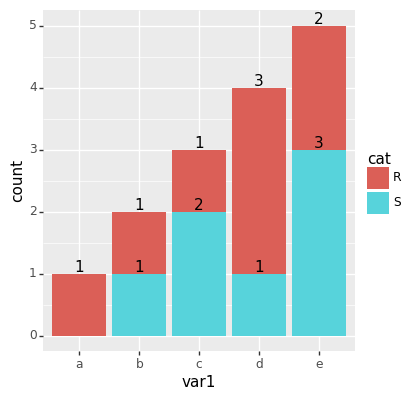

 Plotnine-prism theme styling: 

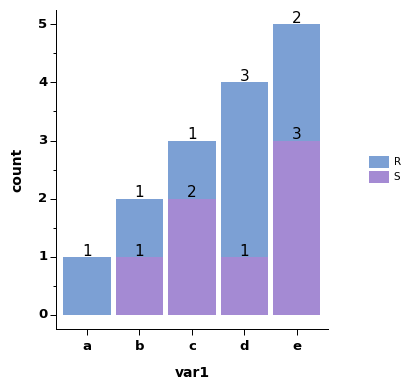

In [3]:
# Stacked Bar Chart: Base ggplot2-like vs. Plotnine-prism

p1 = base
p2 = (
    base + 
    scale_color_prism('floral') +
    scale_fill_prism('floral') +
    theme_prism() 
)
print('Base ggplot2-like styling:',p1,'Plotnine-prism theme styling:', p2)

Adjusting things further to get a result more like style I see in example from Prism Viewer:

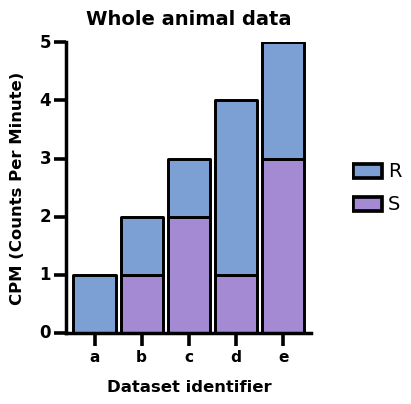

<Figure Size: (400 x 400)>

In [4]:
# Keep your original base plot with original data
base = (
    ggplot(df, aes("var1", fill="cat"))
    + geom_bar(color='black', size=1.2)
)

p3 = (
    base + 
    scale_color_prism('floral') +
    scale_fill_prism('floral') +
    theme_prism() +
    theme(
        # Thick axis lines
        axis_line_x=element_line(size=2.5, color='black'),
        axis_line_y=element_line(size=2.5, color='black'),
        # Major ticks, no minor ticks
        axis_ticks_x=element_line(size=2.6, color='black'),
        axis_ticks_y=element_line(size=2.6, color='black'),
        axis_ticks_length=9,
        # Remove minor ticks
        axis_ticks_minor=element_blank(),
        axis_ticks_minor_x=element_blank(),
        axis_ticks_minor_y=element_blank(),
        # Larger y-axis tick label text
        axis_text_y=element_text(size=12),
        axis_text_x=element_text(size=11.1),
        # Larger axis titles
        axis_title_x=element_text(size=11.85),
        axis_title_y=element_text(size=11.85),
        # Larger Plot title
        plot_title=element_text(size=14),
        # -----------------------#
        # Rectangular legend boxes
        legend_key_width=23,
        legend_key_height=13,
        legend_entry_spacing=10, # for increasing spacing between legend items
        legend_text=element_text(size=14),
        legend_key=element_blank(),
        # -----------------------#
        # Remove panel border
        panel_border=element_blank(),
        axis_line=element_blank()
    ) +
    # Try adding the legend border through guides instead
    guides(fill=guide_legend(override_aes=dict(color='black', size=1.5))) +
    scale_y_continuous(limits=[0, df['var1'].value_counts().max()], expand=(0, 0, 0, 0)  ) +
    labs(
        title="Whole animal data",
        x="Dataset identifier", 
        y="CPM (Counts Per Minute)"
    )
)
p3

And if identifiers were longer and you needed to rotate them:

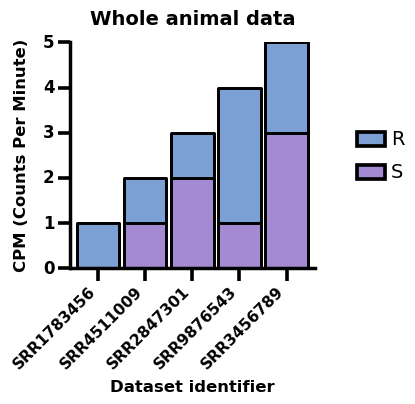

<Figure Size: (400 x 400)>

In [5]:
# Keep your original base plot with original data
base = (
    ggplot(df, aes("var1", fill="cat"))
    + geom_bar(color='black', size=1.2)
)

p3 = (
    base + 
    scale_color_prism('floral') +
    scale_fill_prism('floral') +
    scale_x_discrete(labels=["SRR1783456", "SRR4511009", "SRR2847301", "SRR9876543", "SRR3456789"]) +
    theme_prism() +
    theme(
        # Thick axis lines
        axis_line_x=element_line(size=2.5, color='black'),
        axis_line_y=element_line(size=2.5, color='black'),
        # Major ticks, no minor ticks
        axis_ticks_x=element_line(size=2.6, color='black'),
        axis_ticks_y=element_line(size=2.6, color='black'),
        axis_ticks_length=9,
        # Remove minor ticks
        axis_ticks_minor=element_blank(),
        axis_ticks_minor_x=element_blank(),
        axis_ticks_minor_y=element_blank(),
        # Larger y-axis tick label text
        axis_text_y=element_text(size=12),
        axis_text_x=element_text(size=11.1, angle=45, hjust=1, vjust=1, margin={'t': 1.8}),
        # Larger axis titles
        axis_title_x=element_text(size=11.85),
        axis_title_y=element_text(size=11.85),
        # Larger Plot title
        plot_title=element_text(size=14),
        # -----------------------#
        # Rectangular legend boxes
        legend_key_width=23,
        legend_key_height=13,
        legend_entry_spacing=10, # for increasing spacing between legend items
        legend_text=element_text(size=14),
        legend_key=element_blank(),
        # -----------------------#
        # Remove panel border
        panel_border=element_blank(),
        axis_line=element_blank()
    ) +
    # Try adding the legend border through guides instead
    guides(fill=guide_legend(override_aes=dict(color='black', size=1.5))) +
    scale_y_continuous(limits=[0, df['var1'].value_counts().max()], expand=(0, 0, 0, 0)  ) +
    labs(
        title="Whole animal data",
        x="Dataset identifier", 
        y="CPM (Counts Per Minute)"
    )
)
p3

----
Enjoy!